In [4]:
# We want to create a notebook that will train a model that will learn to estimate an output of a function which takes an variable number of numbers as input and outputs a single number. The function is definition is in "matieral" function
%matplotlib notebook

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from lion_pytorch import Lion

# This is the function we want to learn. It takes an array of numbers and outputs a single number
def material(arr: np.ndarray[np.int32]) -> np.int32:
    result = 0
    left = 0
    right = len(arr) - 1
    leftmax = 0
    rightmax = 0

    while(left < right):
        if(arr[left] < arr[right]):
            if(arr[left] >= leftmax):
                leftmax = arr[left]
            else:
                result += leftmax - arr[left]
            left += 1
        else:
            if(arr[right] >= rightmax):
                rightmax = arr[right]
            else:
                result += rightmax - arr[right]
            right -= 1
    return result



In [5]:
# Now we must build the model architecture. We will use technique called padding, which will enable our model to work with variable length data

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1000, 500)
        self.layer2 = nn.Linear(500, 500)
        self.layer3 = nn.Linear(500, 500)
        self.layer4 = nn.Linear(500, 500)
        self.lastLayer = nn.Linear(500, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = nn.functional.pad(x, (0, 1000 - x.shape[0]))
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.lastLayer(x)
        return torch.round(x)
    
model = Model()
print(model)

Model(
  (layer1): Linear(in_features=1000, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=500, bias=True)
  (layer4): Linear(in_features=500, out_features=500, bias=True)
  (lastLayer): Linear(in_features=500, out_features=1, bias=True)
  (relu): ReLU()
)


Iteration: 0 Loss: 413512224.0
Iteration: 1000 Loss: 89605152.0
Iteration: 2000 Loss: 336906016.0
Iteration: 3000 Loss: 1829700608.0
Iteration: 4000 Loss: 228614400.0
Iteration: 5000 Loss: 1084845952.0
Iteration: 6000 Loss: 175695024.0
Iteration: 7000 Loss: 486996608.0
Iteration: 8000 Loss: 827540288.0
Iteration: 9000 Loss: 1742728576.0


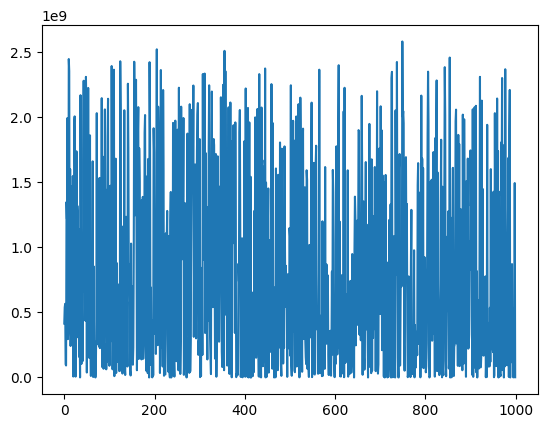

In [6]:
# Train the model with randomly generated data and output from material function

optimizer = Lion(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
model.to("cuda")

losses = []

for i in range(10000):
    input = torch.from_numpy(np.random.randint(0, 100, np.random.randint(1, 1000, 1))).float()
    output = torch.from_numpy(np.array([material(input.numpy())])).float()
    optimizer.zero_grad()
    
    input = input.cuda()
    output = output.cuda()

    pred = model(input)
    loss = criterion(pred, output)
    loss.backward()
    optimizer.step()
    if(i % 1000 == 0):
        print("Iteration: " + str(i) + " Loss: " + str(loss.item()))
    if(i % 10 == 0):
        losses.append(loss.item())

plt.plot(losses)